In [256]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [195]:
DATA_PATH = '/tf/home/kwyou/jobcare'

eda_df = pd.read_csv(DATA_PATH + '/train.csv', index_col=0)

train_df = pd.read_csv(DATA_PATH + '/train.csv', index_col=0)
test_df = pd.read_csv(DATA_PATH + '/test.csv', index_col=0)

In [79]:
eda_df.describe()

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.0,...,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,5.019510e+05,501951.000000,501951.00000
mean,1.340055,2.575767,2.782742,2.380049,537.296399,545.833926,534.994095,3.626302,1.0,1.0,...,1.386052,1.963307,1030.863194,581.505215,2.240486,3.922988,132.530916,5.141115e+05,337674.345074,0.49974
std,0.473728,2.390872,0.883072,1.827910,411.441926,403.328742,415.752072,1.846717,0.0,0.0,...,0.793128,0.188007,527.235733,413.915756,1.556468,1.159992,87.142309,2.943547e+05,219518.485557,0.50000
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.0,1.0,...,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,7.000000e+00,20.000000,0.00000
25%,1.000000,0.000000,2.000000,1.000000,117.000000,148.000000,136.000000,3.000000,1.0,1.0,...,1.000000,2.000000,597.000000,138.000000,1.000000,3.000000,57.000000,2.599785e+05,140899.000000,0.00000
50%,1.000000,2.000000,3.000000,1.000000,453.000000,464.000000,452.000000,4.000000,1.0,1.0,...,1.000000,2.000000,953.000000,581.000000,1.000000,4.000000,118.000000,4.981190e+05,304996.000000,0.00000
75%,2.000000,5.000000,4.000000,5.000000,935.000000,963.000000,929.000000,5.000000,1.0,1.0,...,1.000000,2.000000,1582.000000,974.000000,4.000000,4.000000,199.000000,7.656345e+05,535184.000000,1.00000
max,2.000000,7.000000,5.000000,5.000000,1258.000000,1258.000000,1258.000000,11.000000,1.0,1.0,...,4.000000,2.000000,2013.000000,1258.000000,5.000000,11.000000,311.000000,1.049005e+06,753628.000000,1.00000


In [197]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501951 entries, 0 to 501950
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   d_l_match_yn            501951 non-null  bool  
 1   d_m_match_yn            501951 non-null  bool  
 2   d_s_match_yn            501951 non-null  bool  
 3   h_l_match_yn            501951 non-null  bool  
 4   h_m_match_yn            501951 non-null  bool  
 5   h_s_match_yn            501951 non-null  bool  
 6   person_attribute_a      501951 non-null  int64 
 7   person_attribute_a_1    501951 non-null  int64 
 8   person_attribute_b      501951 non-null  int64 
 9   person_prefer_c         501951 non-null  int64 
 10  person_prefer_d_1       501951 non-null  int64 
 11  person_prefer_d_2       501951 non-null  int64 
 12  person_prefer_d_3       501951 non-null  int64 
 13  person_prefer_e         501951 non-null  int64 
 14  person_prefer_f         501951 non-n

In [198]:
# 모든 값이 1이기 때문에 제거
eda_df.drop(['person_prefer_g', 'person_prefer_f'], axis=1, inplace=True)
train_df.drop(['person_prefer_g', 'person_prefer_f'], axis=1, inplace=True)
test_df.drop(['person_prefer_g', 'person_prefer_f'], axis=1, inplace=True)

In [199]:
eda_df['contents_open_dt'] = pd.to_datetime(eda_df['contents_open_dt'])

In [200]:
def split_datetime(df) :
#     df['year'] = df['contents_open_dt'].dt.year
    df['month'] = df['contents_open_dt'].dt.month
    df['day'] = df['contents_open_dt'].dt.day
    df['hour'] = df['contents_open_dt'].dt.hour
    df['minute'] = df['contents_open_dt'].dt.minute
    return df

In [201]:
eda_df = split_datetime(eda_df)

<AxesSubplot:xlabel='minute', ylabel='count'>

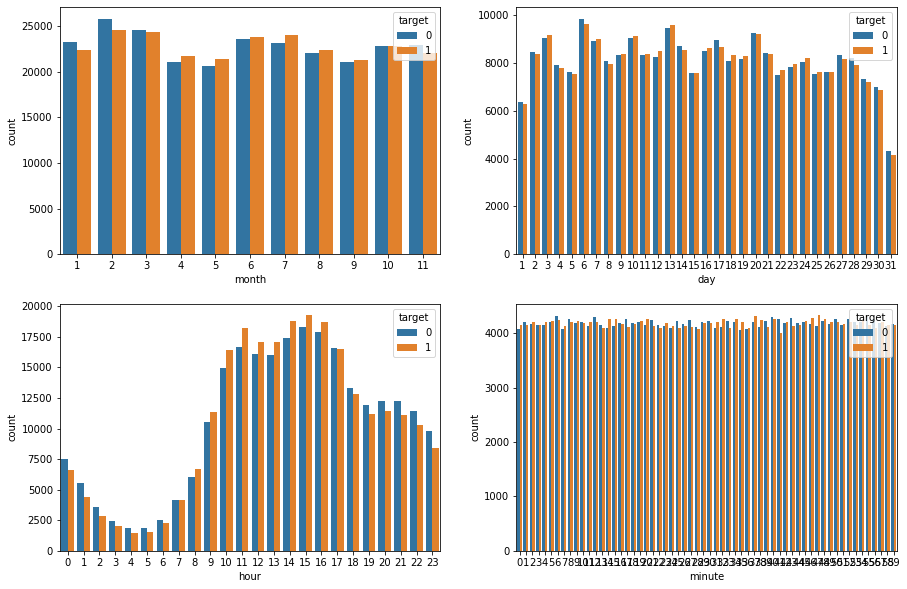

In [202]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.countplot(eda_df['month'], hue=eda_df['target'])
plt.subplot(2, 2, 2)  
sns.countplot(eda_df['day'], hue=eda_df['target'])
plt.subplot(2, 2, 3)
sns.countplot(eda_df['hour'], hue=eda_df['target'])
plt.subplot(2, 2, 4)  
sns.countplot(eda_df['minute'], hue=eda_df['target'])

<AxesSubplot:>

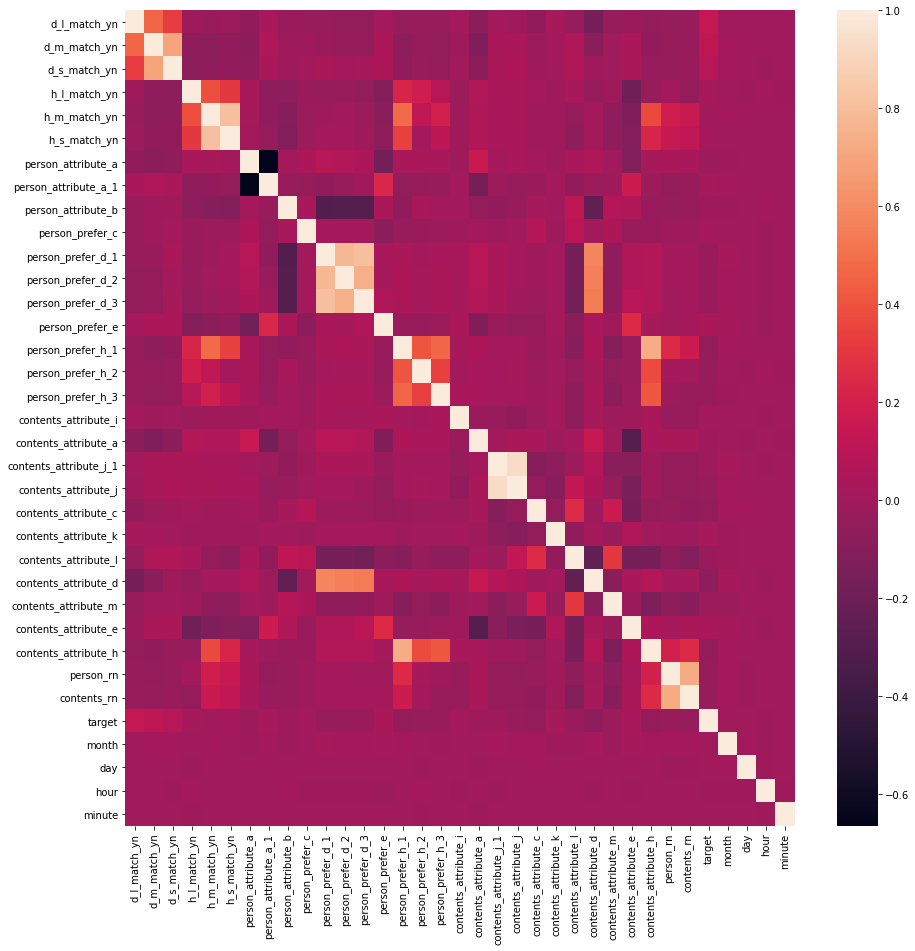

In [203]:
plt.figure(figsize=(15,15))
sns.heatmap(eda_df.corr())

In [204]:
eda_df.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'month', 'day', 'hour', 'minute'],
      dtype='object')

  a   c     d   e h  b
i a j c k l d m e h

In [205]:
eda_df['diff_a'] = eda_df['person_attribute_a'] - eda_df['contents_attribute_a']
eda_df['diff_c'] = eda_df['person_prefer_c'] - eda_df['contents_attribute_c']
eda_df['diff_d'] = eda_df['person_prefer_d_3'] - eda_df['contents_attribute_d']
eda_df['diff_e'] = eda_df['person_prefer_e'] - eda_df['contents_attribute_e']
eda_df['diff_h'] = eda_df['person_prefer_e'] - eda_df['contents_attribute_h']

<AxesSubplot:>

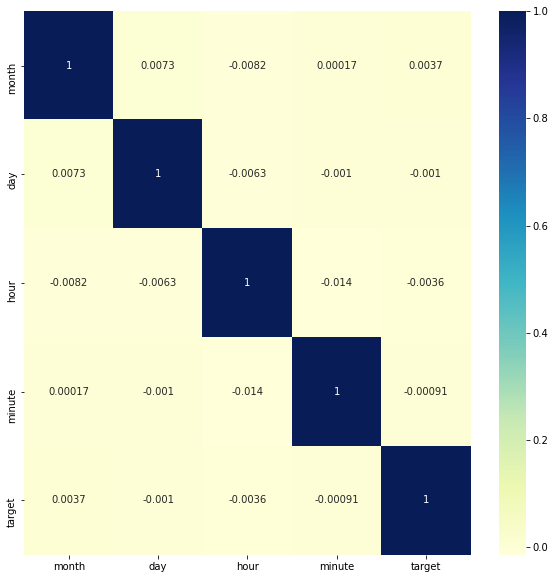

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(eda_df.loc[:,['month','day','hour','minute','target']].corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:>

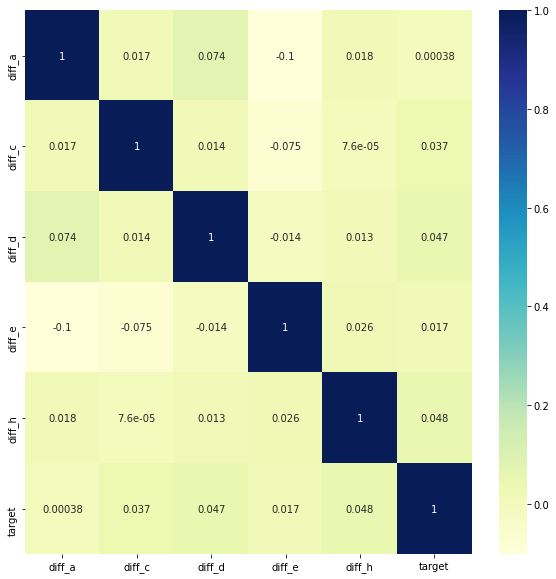

In [207]:
plt.figure(figsize=(10,10))
sns.heatmap(eda_df.loc[:,['diff_a','diff_c','diff_d','diff_e','diff_h','target']].corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='h_s_match_yn', ylabel='count'>

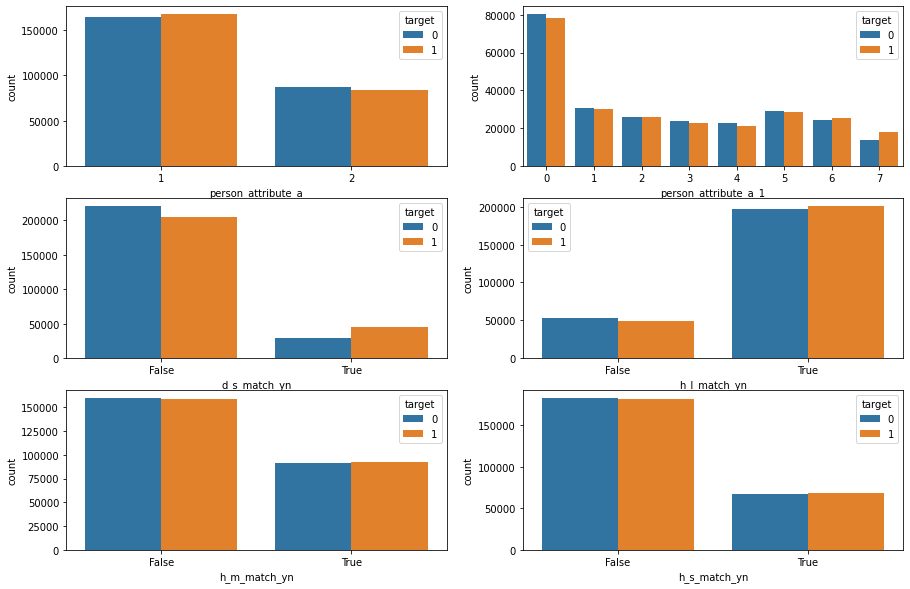

In [259]:
plt.figure(figsize=(15,10))
plt.subplot(3, 2, 1)
sns.countplot(eda_df['person_attribute_a'], hue=eda_df['target'])
plt.subplot(3, 2, 2)  
sns.countplot(eda_df['person_attribute_a_1'], hue=eda_df['target'])
plt.subplot(3, 2, 3)
sns.countplot(eda_df['d_s_match_yn'], hue=eda_df['target'])
plt.subplot(3, 2, 4)  
sns.countplot(eda_df['h_l_match_yn'], hue=eda_df['target'])
plt.subplot(3, 2, 5)  
sns.countplot(eda_df['h_m_match_yn'], hue=eda_df['target'])
plt.subplot(3, 2, 6)  
sns.countplot(eda_df['h_s_match_yn'], hue=eda_df['target'])

In [220]:
eda_df.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'month', 'day', 'hour', 'minute', 'diff_a', 'diff_c',
       'diff_d', 'diff_e', 'diff_h'],
      dtype='object')

In [236]:
sa = pd.pivot_table(data=eda_df, values='contents_rn', index='person_rn', columns='target', aggfunc='count')
sa.fillna(0, inplace=True)
sa.reset_index(inplace=True)

In [237]:
sa[0]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
300172    3.0
300173    0.0
300174    1.0
300175    2.0
300176    1.0
Name: 0, Length: 300177, dtype: float64

In [ ]:
plt.figure(figsize=(150,10))
sns.barplot(x=list(sa[0].index), y=sa[0])
sns.barplot(x=list(sa[1].index), y=sa[1])